In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import Model
from keras.layers import Input,Dense,LSTM,GRU,BatchNormalization,Dropout,concatenate
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import drive
drive.mount('/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
X_data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/X_train_new1.csv')
Y_data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Y_train_new1.csv')
X_data.drop([X_data.columns[0]],axis = 1,inplace = True)
Y_data.drop([Y_data.columns[0]],axis = 1,inplace = True)
print(X_data.shape)
print(Y_data.shape)

(366760, 18)
(366760, 1)


**15 days training**

In [3]:
X_train_15 = pd.DataFrame()
X_test_15 = pd.DataFrame()
Y_train_15 = pd.DataFrame()
Y_test_15 = pd.DataFrame()
for i in range(0,40) :
  X_train_15 = X_train_15.append(X_data.iloc[9169*i : (9169*i) + 2160,:])
  X_test_15 = X_test_15.append(X_data.iloc[9169*i + 2160 : 9169*i + 2880,:])
  Y_train_15 = Y_train_15.append(Y_data.iloc[9169*i : (9169*i) + 2160,:])
  Y_test_15 = Y_test_15.append(Y_data.iloc[9169*i + 2160 : 9169*i + 2880,:])
print(X_train_15.shape)
print(Y_train_15.shape)
print(X_test_15.shape)
print(Y_test_15.shape)

(86400, 18)
(86400, 1)
(28800, 18)
(28800, 1)


Random Forest

In [4]:
X_train_rf = X_train_15.drop([X_train_15.columns[0],X_train_15.columns[1],X_train_15.columns[2],X_train_15.columns[3],X_train_15.columns[4],X_train_15.columns[10],X_train_15.columns[11],X_train_15.columns[12],X_train_15.columns[13]],axis = 1)
X_train_rf.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg
0,135,129,150,164,152,40.776228,-73.982119,4,153
1,129,150,164,152,131,40.776228,-73.982119,4,137
2,150,164,152,131,138,40.776228,-73.982119,4,137
3,164,152,131,138,147,40.776228,-73.982119,4,144
4,152,131,138,147,127,40.776228,-73.982119,4,132


In [5]:
X_test_rf = X_test_15.drop([X_test_15.columns[0],X_test_15.columns[1],X_test_15.columns[2],X_test_15.columns[3],X_test_15.columns[4],X_test_15.columns[10],X_test_15.columns[11],X_test_15.columns[12],X_test_15.columns[13]],axis = 1)
X_test_rf.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg
2160,58,40,45,42,34,40.776228,-73.982119,5,36
2161,40,45,42,34,46,40.776228,-73.982119,5,42
2162,45,42,34,46,40,40.776228,-73.982119,5,40
2163,42,34,46,40,43,40.776228,-73.982119,5,42
2164,34,46,40,43,29,40.776228,-73.982119,5,32


In [6]:
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(X_train_rf, Y_train_15)
y_pred = regr1.predict(X_test_rf)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(X_train_rf)
rndf_train_predictions = [round(value) for value in y_pred]
Y_train_arr = np.array(Y_train_15)
Y_test_arr = np.array(Y_test_15)
print("Train MAE = ", mean_absolute_error(Y_train_15,rndf_train_predictions))
print("Train MAPE = ",(mean_absolute_error(Y_train_15,rndf_train_predictions)/((sum(Y_train_arr))/len(Y_train_arr))))
print("Test MAE = ", mean_absolute_error(Y_test_15,rndf_test_predictions))
print("Test MAPE = ",(mean_absolute_error(Y_test_15,rndf_test_predictions)/((sum(Y_test_arr))/len(Y_test_arr))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train MAE =  5.6583449074074075
Train MAPE =  [0.09342881]
Test MAE =  8.325277777777778
Test MAPE =  [0.13122025]


ANN

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 86400 samples, validate on 28800 samples
Epoch 1/500
86400/86400 [==============================] - 12s 140us/step - loss: 43.2979 - mean_absolute_error: 43.9818 - val_loss: 40.6537 - val_mean_absolute_error: 41.3295
Epoch 2/500
86400/86400 [==============================] - 6s 71us/step - loss: 23.2114 - mean_absolute_error: 23.8858 - val_loss: 23.3244 - val_mean_absolute_error: 23.9835
Epoch 3/500
86400/86400 [==============================] - 6s 71us/step - loss: 15.5560 - mean_absolute_error: 16.2226 - val_loss: 22.6265 - val_mean_absolute_error: 23.2828
Epoch 4/500
86400/86400 [==============================] - 6s 71us/step - loss: 13.6538 - mean_absolute_error: 14.3169 - val_loss: 23.4982 - val_mean_absolute_error: 24.1684
Epoch 5/500
86400

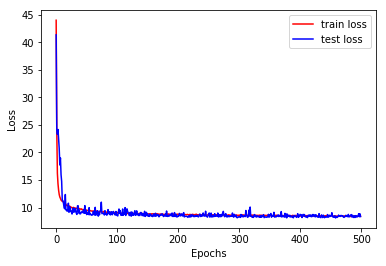

In [7]:
input_shape = (X_train_15.shape[1],)
input_case = Input(shape = input_shape)
tower = Dense(1024, activation = 'relu', kernel_initializer = 'he_normal')(input_case)
tower = BatchNormalization()(tower)
tower = Dropout(0.5)(tower)
tower = Dense(1024, activation = 'relu', kernel_initializer = 'he_normal')(tower)
tower = BatchNormalization()(tower)
tower = Dropout(0.5)(tower)
tower = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(tower)

#block 1
tower1 = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(tower)
tower1 = BatchNormalization()(tower1)
tower1 = Dropout(0.5)(tower1)
tower1 = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(tower1)
tower1 = BatchNormalization()(tower1)
tower1 = Dropout(0.5)(tower1)

#block 2
tower2 = Dense(1024, activation = 'relu', kernel_initializer = 'he_normal')(tower)
tower2 = BatchNormalization()(tower2)
tower2 = Dropout(0.5)(tower2)

#block 3
tower3 = Dense(1024, activation = 'relu', kernel_initializer = 'he_normal')(tower)
tower3 = BatchNormalization()(tower3)
tower3 = Dropout(0.5)(tower3)
tower3 = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(tower3)
tower3 = BatchNormalization()(tower3)
tower3 = Dropout(0.5)(tower3)

out = concatenate([tower1,tower2,tower3], axis = 1)
out = Dense(1024,activation = 'relu',kernel_initializer = 'he_normal')(out)
out = BatchNormalization()(out)
out = Dropout(0.5)(out)
out = Dense(1024,activation = 'relu',kernel_initializer = 'he_normal')(out)
out = BatchNormalization()(out)
out = Dropout(0.5)(out)
out = Dense(512,activation = 'relu',kernel_initializer = 'he_normal')(out)
out = BatchNormalization()(out)
out = Dense(1024)(out)
out = Dense(1)(out)

model = Model(input_case,out)
model.compile(loss = 'logcosh',optimizer = 'adamax', metrics = ['mae'])
history = model.fit(X_train_15,Y_train_15,verbose = 1,epochs = 500,batch_size = 1000,validation_data = (X_test_15,Y_test_15))

#error calculation
test_mae = min(history.history['val_mean_absolute_error'])
train_mae = min(history.history['mean_absolute_error'])
print("Train MAE = ",train_mae)
print("Train MAPE = ",(train_mae/((sum(Y_train_arr))/len(Y_train_arr))))
print("Test MAE = ",test_mae)
print("Test MAPE = ",(test_mae/((sum(Y_test_arr))/len(Y_test_arr))))

#plot
plt.plot(history.history['mean_absolute_error'],color = 'red')
plt.plot(history.history['val_mean_absolute_error'],color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train loss','test loss'])
plt.show()